<a href="https://colab.research.google.com/github/saranpydev/SCT_DS_04/blob/main/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-7-1789247132.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


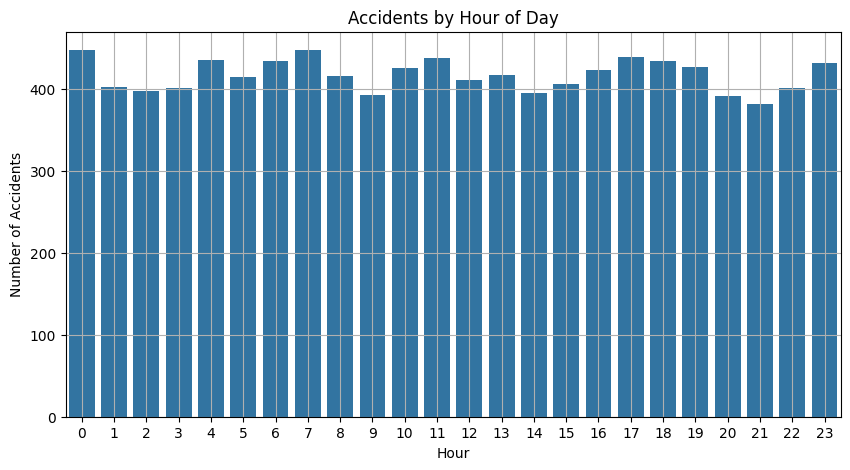

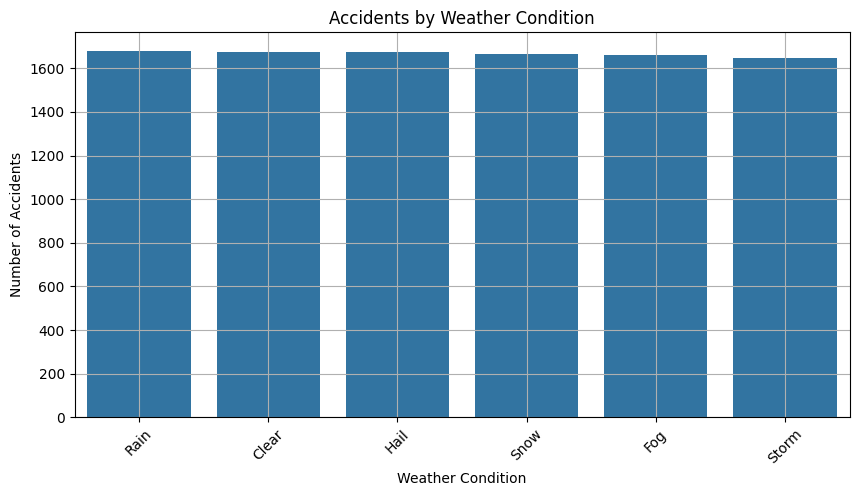

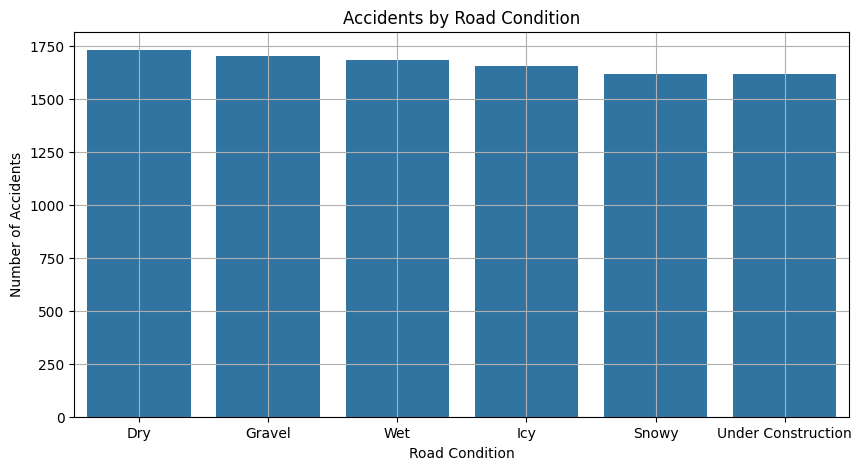

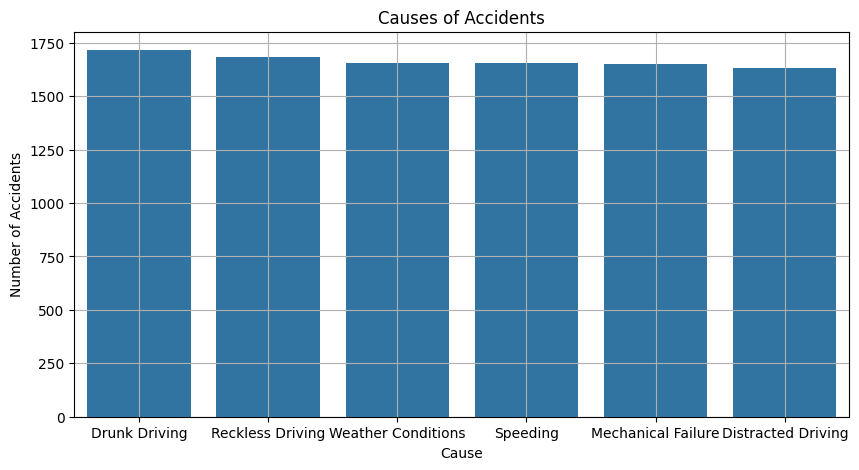

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
df = pd.read_csv('/content/global_traffic_accidents.csv')

# Extract hour from time
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# 1. Accidents by Time of Day
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# 2. Weather Condition vs Accidents
plt.figure(figsize=(10, 5))
sns.countplot(x='Weather Condition', data=df, order=df['Weather Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=45)
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# 3. Road Condition vs Accidents
plt.figure(figsize=(10, 5))
sns.countplot(x='Road Condition', data=df, order=df['Road Condition'].value_counts().index)
plt.title('Accidents by Road Condition')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# 4. Accident Hotspots (Heatmap)
heatmap_data = df[['Latitude', 'Longitude']].dropna()
map_center = [heatmap_data['Latitude'].mean(), heatmap_data['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=2)
HeatMap(heatmap_data.values.tolist()).add_to(accident_map)
accident_map.save('/content/global_traffic_accidents.csvt_hotspots_map.html')

# 5. Causes of Accidents
plt.figure(figsize=(10, 5))
sns.countplot(x='Cause', data=df, order=df['Cause'].value_counts().index)
plt.title('Causes of Accidents')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()
